In [1]:
import pandas as pd
import numpy as np
import urllib.request, json, bs4 as bs, requests
import seaborn as sns
import matplotlib.pyplot
import re
import os

In [2]:
basic_county_attributes = pd.read_csv("basic_county_data.csv").iloc[:,1:]
county_income_data = pd.read_csv("county_income_data.csv").iloc[:,1:]
voting_data = pd.read_csv("voting_data.csv").iloc[:,1:]

In [3]:
basic_county_attributes.head()

,State,FIPS,County,County Seat,Population,Land Area (km2),Land Area (mi2),Water Area (km2),Water Area (mi2),Total Area (km2),Total Area (mi2),Latitude,Longitude
0,CA,6001,Alameda,Oakland,1510271,1914.046,739.017,213.185,82.311,2127.231,821.328,37.648081,-121.913304
1,CA,6003,Alpine,Markleeville,1175,1912.272,738.332,12.557,4.848,1924.829,743.180,38.617610,-119.798999
2,CA,6005,Amador,Jackson,38091,1539.963,594.583,29.457,11.373,1569.420,605.956,38.443550,-120.653856
3,CA,6007,Butte,Oroville,220000,4238.423,1636.464,105.326,40.667,4343.749,1677.131,39.665959,-121.601919
4,CA,6009,Calaveras,San Andreas,45578,2641.820,1020.012,43.810,16.915,2685.630,1036.927,38.187844,-120.555115


In [4]:
income_and_voting = (county_income_data.merge(voting_data, on = 'County')
    .drop("Population_y", axis = 1))

all_together = (income_and_voting.merge(basic_county_attributes, on = 'County')
               .drop("Population", axis = 1))

In [5]:
column_names = list(all_together.columns)
column_names[1] = "Population"

all_together.columns = column_names


In [6]:
all_together.head()

,County,Population,Populationdensity,Per capita income,Median household income,Median family income,Registered voters,Democratic,Republican,D–R spread,...,FIPS,County Seat,Land Area (km2),Land Area (mi2),Water Area (km2),Water Area (mi2),Total Area (km2),Total Area (mi2),Latitude,Longitude
0,Alameda,1559308.0,2109.8,36439.0,73775.0,90822.0,54.6,56.4,14.1,42.3,...,6001,Oakland,1914.046,739.017,213.185,82.311,2127.231,821.328,37.648081,-121.913304
1,Alpine,1202.0,1.6,24375.0,61343.0,71932.0,66.1,37.6,30.5,7.1,...,6003,Markleeville,1912.272,738.332,12.557,4.848,1924.829,743.180,38.617610,-119.798999
2,Amador,37159.0,62.5,27373.0,52964.0,68765.0,56.1,31.7,45.0,-13.3,...,6005,Jackson,1539.963,594.583,29.457,11.373,1569.420,605.956,38.443550,-120.653856
3,Butte,221578.0,135.4,24430.0,43165.0,56934.0,55.4,34.4,37.1,-2.7,...,6007,Oroville,4238.423,1636.464,105.326,40.667,4343.749,1677.131,39.665959,-121.601919
4,Calaveras,44921.0,44.0,29296.0,54936.0,67100.0,62.8,30.7,42.5,-11.8,...,6009,San Andreas,2641.820,1020.012,43.810,16.915,2685.630,1036.927,38.187844,-120.555115


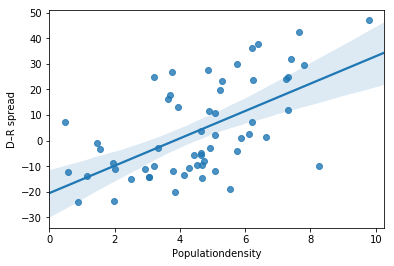

In [7]:
sns.regplot(x = np.log(all_together["Populationdensity"]), 
            y= all_together["D–R spread"])

In [9]:
all_together.to_csv('full_county_data.csv')